In [1]:
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
import numpy as np
import warnings
from IPython.display import Audio

warnings.filterwarnings('ignore')
font = {'size'   : 18}

plt.rc('font', **font)

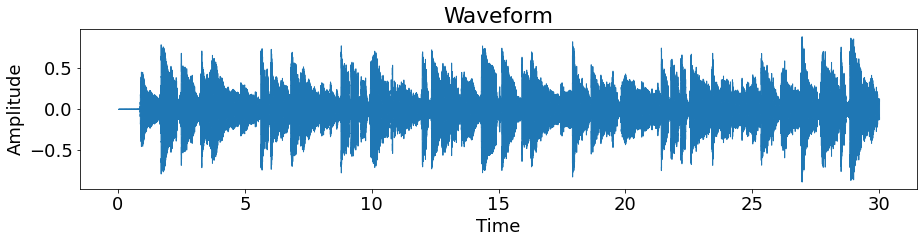

In [2]:
songname = os.fspath("C:/Users/peppe/OneDrive/Desktop/Università/Tesi/YoutubeAudioLibrary/Tracks/motivante/Dulcinea - Steve Adams.mp3")
y, sr = librosa.load(songname, mono=True, duration = 30)
    
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
plt.title('Waveform')
plt.ylabel('Amplitude')
librosa.display.waveshow(y, sr=sr)
plt.show()
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False), power=1)[0]

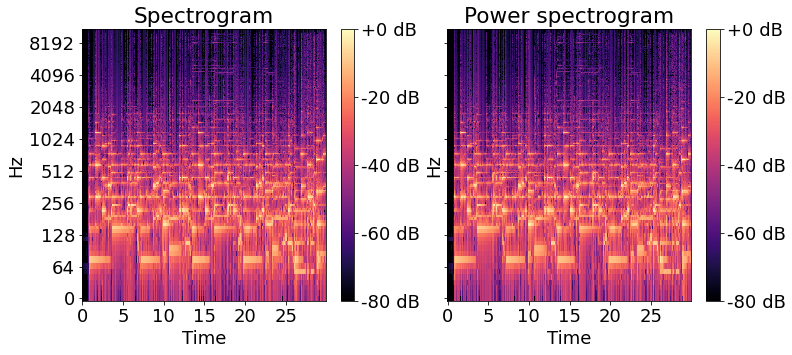

In [32]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
img = librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y, window=np.ones, center=False), ref=np.max),
                               y_axis='log',x_axis='time', ax=ax[0])
ax[0].set_title('Spectrogram')
fig.colorbar(img, ax=ax[0], format="%+2.0f dB")
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[1])
ax[1].set_title('Power spectrogram')
fig.colorbar(img, ax=ax[1], format="%+2.0f dB")
plt.show()

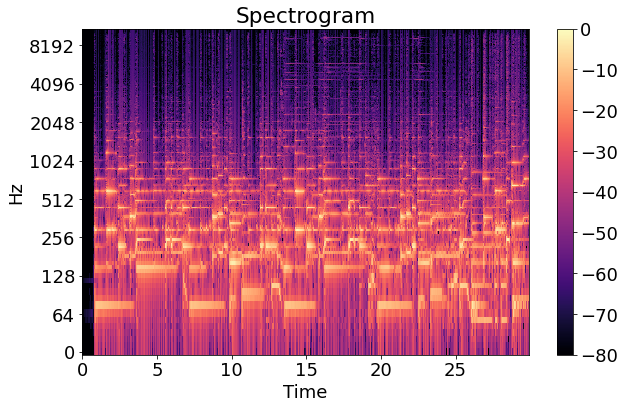

In [31]:
plt.figure(figsize=(10,6))
img = librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(y, window=np.ones, center=False), ref=np.max),
                               y_axis='log',x_axis='time')
plt.colorbar(img)
plt.title("Spectrogram")
plt.show()

Text(0, 0.5, 'Amplitude')

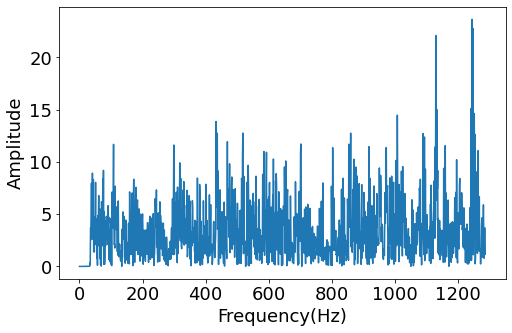

In [4]:
plt.figure(figsize=(8,5))
plt.plot(S[0][:])
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")

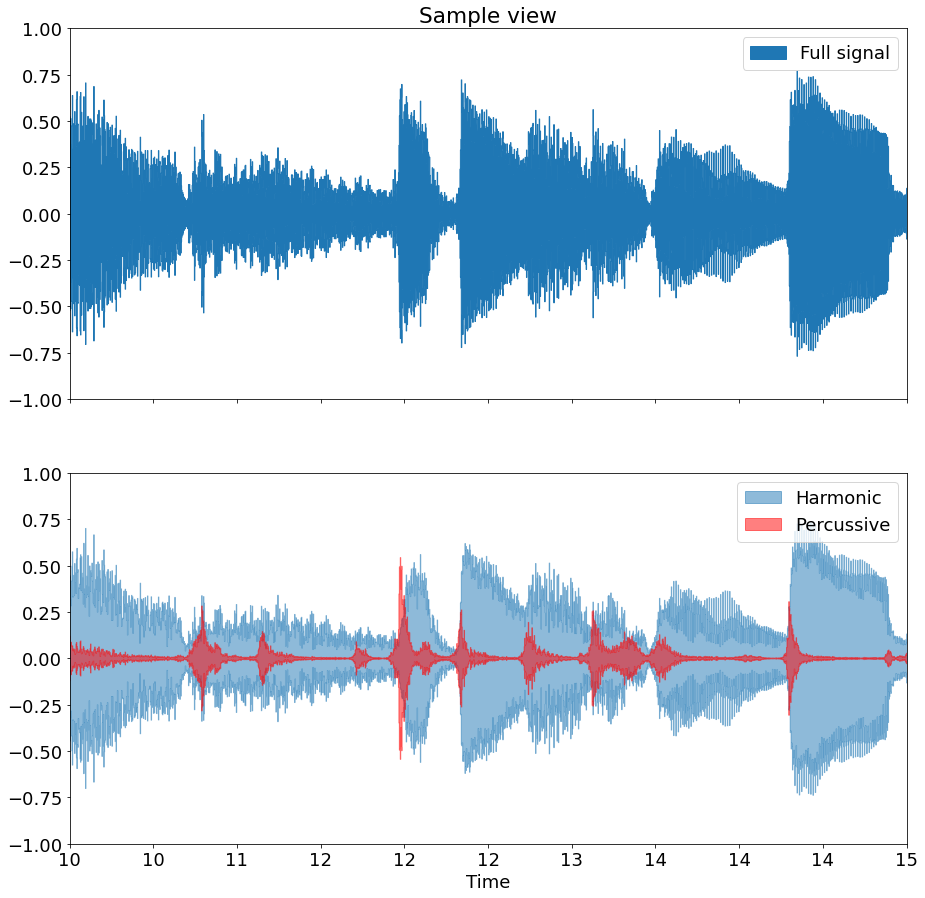

In [5]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,15))
ax.set(xlim=[10.0, 15.0], title='Sample view', ylim=[-1.0, 1.0])
ax2.set(xlim=[10.0, 15.0], ylim=[-1.0, 1.0])
librosa.display.waveshow(y, sr=sr, ax=ax, marker='.', label='Full signal')
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.5, ax=ax2, label='Harmonic')
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5, ax=ax2, label='Percussive')
ax.label_outer()
ax.legend()
ax2.legend()
plt.show()
Audio(y, rate = sr)

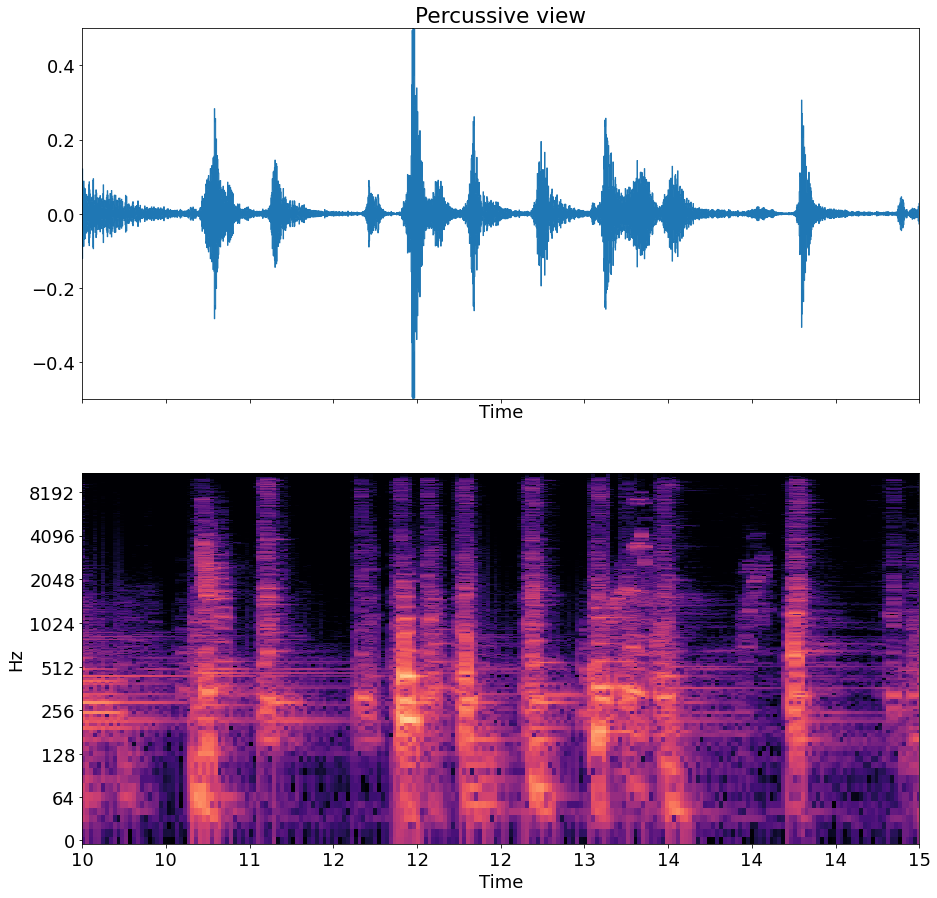

In [6]:
fig, (ax, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,15))
ax.set(xlim=[10.0, 15.0], title='Percussive view', ylim=[-0.5, 0.5])
S_percussive = librosa.magphase(librosa.stft(y_percussive, window=np.ones, center=False))[0]
img = librosa.display.specshow(librosa.amplitude_to_db(S_percussive,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax2)
librosa.display.waveshow(y_percussive, sr=sr, ax = ax, label="Percussive signal")
plt.show()

Audio(y_percussive, rate = sr,)

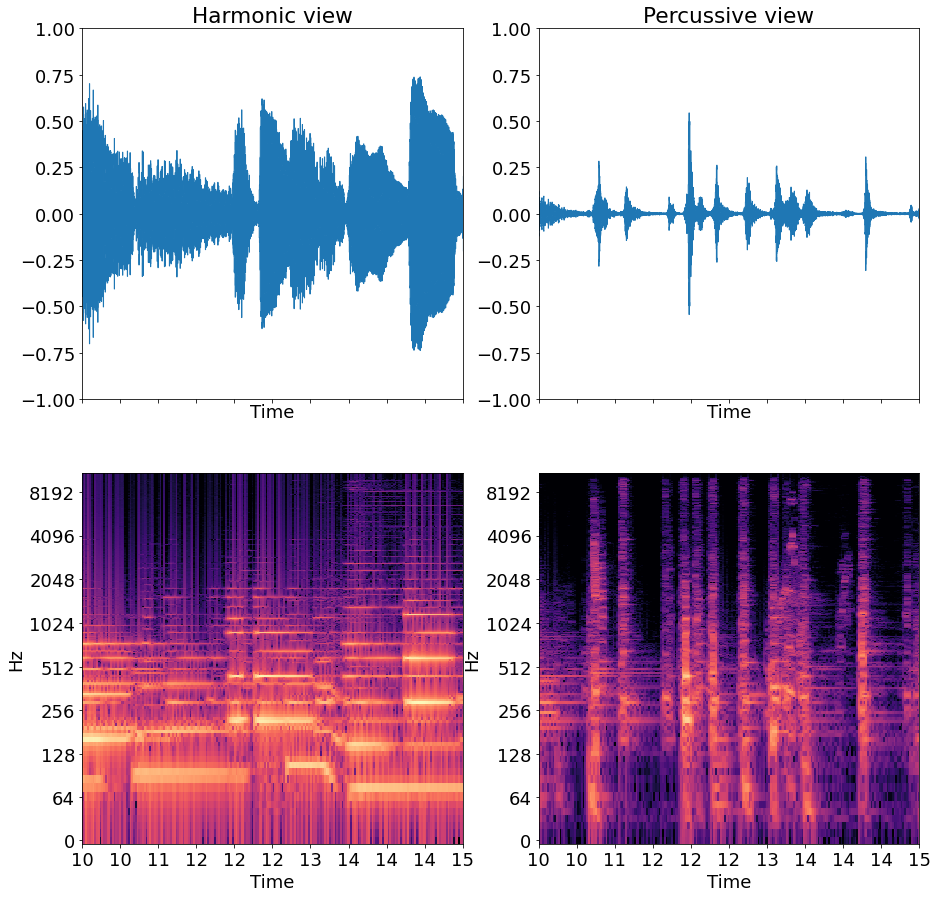

In [7]:
fig, (ax, ax2) = plt.subplots(nrows=2,ncols=2, sharex=True,figsize=(15,15))
ax[0].set(xlim=[10.0, 15.0], title='Harmonic view', ylim=[-1.0, 1.0])
S_harmonic = librosa.magphase(librosa.stft(y_harmonic, window=np.ones, center=False))[0]
img = librosa.display.specshow(librosa.amplitude_to_db(S_harmonic,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax2[0])
librosa.display.waveshow(y_harmonic, sr=sr, ax = ax[0], label="Harmonic signal")
ax[1].set(xlim=[10.0, 15.0], title='Percussive view', ylim=[-1.0, 1.0])
S_percussive = librosa.magphase(librosa.stft(y_percussive, window=np.ones, center=False))[0]
img = librosa.display.specshow(librosa.amplitude_to_db(S_percussive,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax2[1])
librosa.display.waveshow(y_percussive, sr=sr, ax = ax[1], label="Percussive signal")
plt.show()
Audio(y_harmonic, rate = sr)

In [8]:
tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)
tempo = int(tempo)

print(tempo)

75


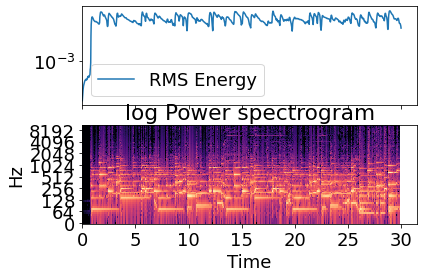

In [9]:
rms = librosa.feature.rms(y=y, S=S)
#rmse = librosa.util.normalize(rmse)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()

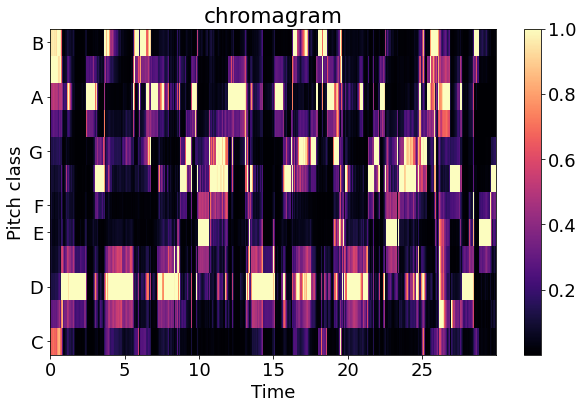

In [10]:
chroma = librosa.feature.chroma_stft(y=y_harmonic, sr=sr)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='chromagram')
fig.colorbar(img, ax=ax)

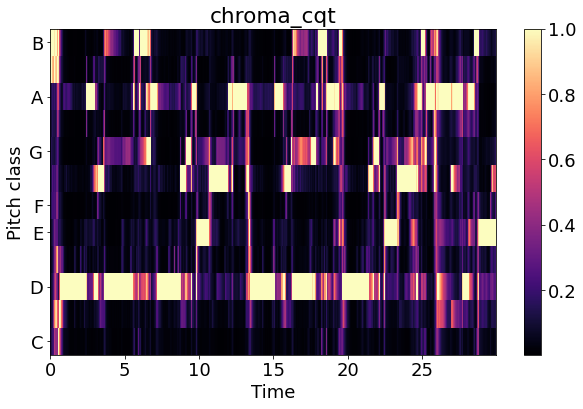

In [11]:
chroma = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

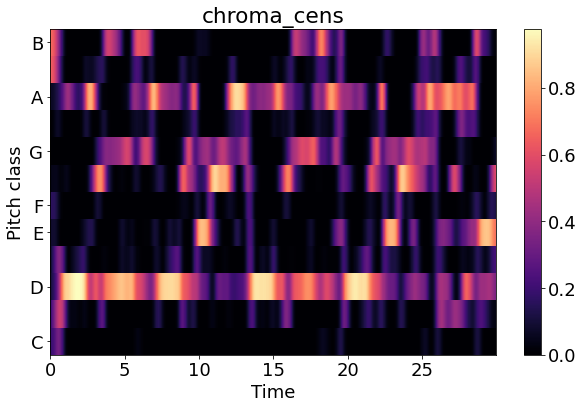

In [12]:
chroma = librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='chroma_cens')
fig.colorbar(img, ax=ax)
#chroma = librosa.util.normalize(chroma)

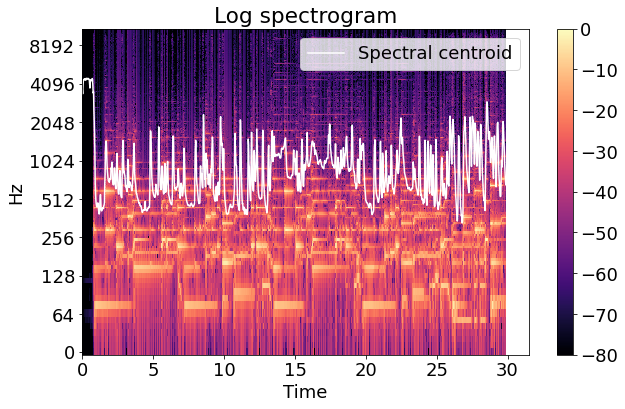

In [13]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
times = librosa.times_like(cent)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='Log spectrogram')
#cent = librosa.util.normalize(cent)
fig.show()

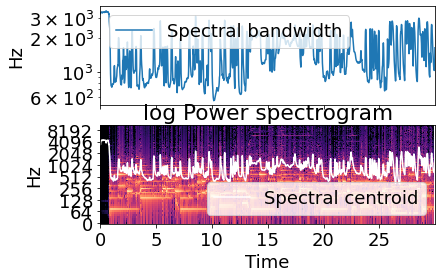

In [14]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)

ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
#ax[1].fill_between(times, np.maximum(0, cent[0] - spec_bw[0]),
                 #   np.minimum(cent[0] + spec_bw[0], sr/2),
                  #  alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, cent[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')
#spec_bw = librosa.util.normalize(spec_bw)

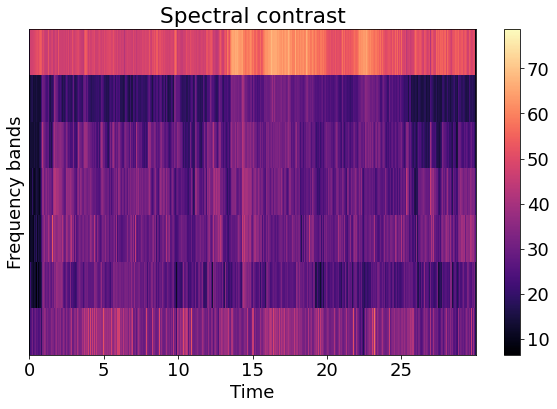

In [15]:
contrast = librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(contrast, x_axis='time')
fig.colorbar(img, ax=ax)
ax.set_ylabel('Frequency bands')
ax.set_title('Spectral contrast')
ax.set_in_layout('tight')
plt.show()
#contrast = librosa.util.normalize(contrast)

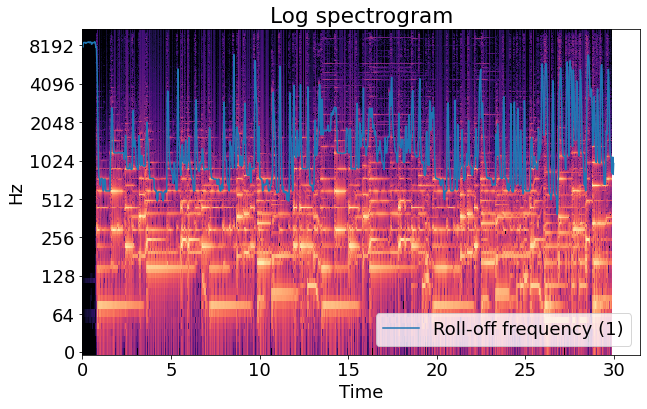

In [16]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (1)')
ax.legend(loc='lower right')
ax.set(title='Log spectrogram')
plt.show()
#rolloff = librosa.util.normalize(rolloff)

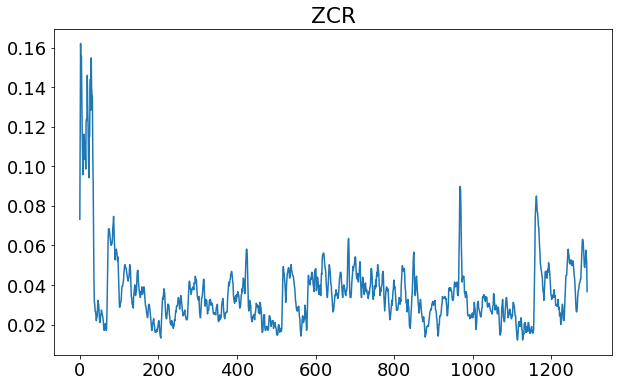

In [20]:
zcr = librosa.feature.zero_crossing_rate(y_harmonic)
plt.figure(figsize=(10, 6))
plt.plot(zcr[0])
plt.title('ZCR')
plt.show()
# zcr = librosa.util.normalize(zcr)

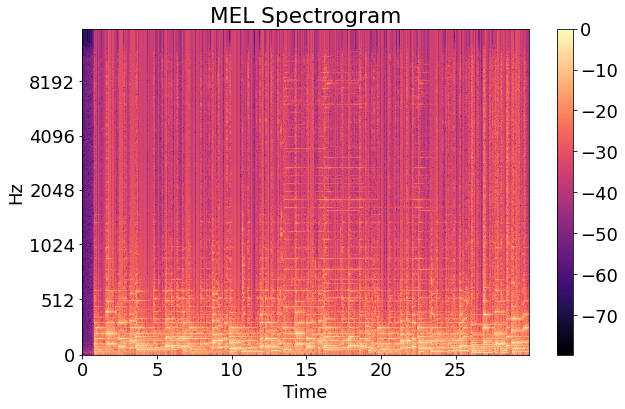

In [22]:
plt.figure(figsize=(10,6))
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                                   x_axis='time', y_axis='mel', fmax=16000)
plt.colorbar(img)
plt.title("MEL Spectrogram")
plt.show()

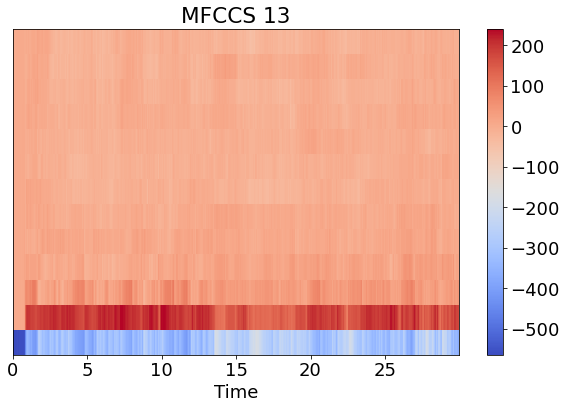

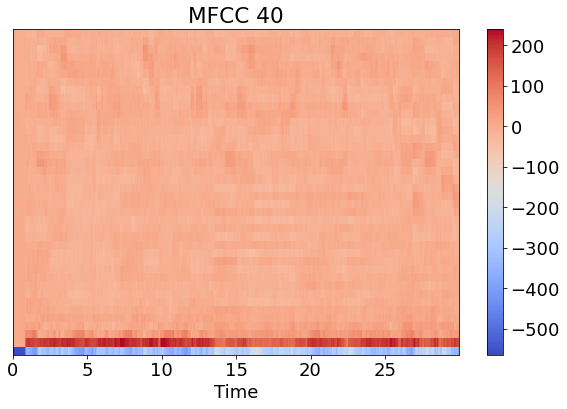

In [28]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
plt.figure(figsize=(10,6))
img = librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(img)
plt.title("MFCCS 13")
plt.show()
# mfccs = librosa.util.normalize(mfccs)

mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=40)
plt.figure(figsize=(10,6))
img = librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(img)
plt.title('MFCC 40')
plt.show()